# **Machine learning Experiment-7**
## **Support Vector Machines**

Dhruv Kangavkar- 1032221800

Batch-G1

ECE-AIML B


# **Post-lab questions:**
1. Name the various Kernel functions in case of SVM.

* Linear Kernel


Use Case: It is used when the data is linearly separable or when the number of features is very large. It’s the simplest kernel and works well when the data can be separated by a straight line (or hyperplane in higher dimensions).

*  Polynomial Kernel

Use Case: The polynomial kernel is useful when the data is not linearly separable but can be separated using polynomial decision boundaries. The parameter
𝑑 defines the degree of the polynomial, and 𝑐 is a constant.


Parameters:
Degree (d): Controls the flexibility of the decision boundary.
Constant (c): Shifts the polynomial to control the model's complexity.


* Radial Basis Function (RBF) Kernel / Gaussian Kernel

Use Case: This is the most widely used kernel for non-linearly separable data. It transforms the data into a higher dimension where it may be linearly separable. The RBF kernel is powerful when the relationship between class labels and attributes is complex and not easily separable in the original feature space.

Parameter:
Gamma (γ): Determines how far the influence of a single training example reaches. A small gamma means a larger influence radius, while a large gamma creates a narrower, more localized influence.

* Sigmoid Kernel

Use Case: This kernel behaves like a neural network with one hidden layer. It's sometimes used as a proxy to model the data in a way similar to neural networks. It’s not as commonly used as RBF or polynomial kernels.

Parameters:
Alpha (α): Controls the steepness of the kernel.
Constant (c): Similar to the constant in the polynomial kernel, it shifts the kernel and impacts the model's flexibility.

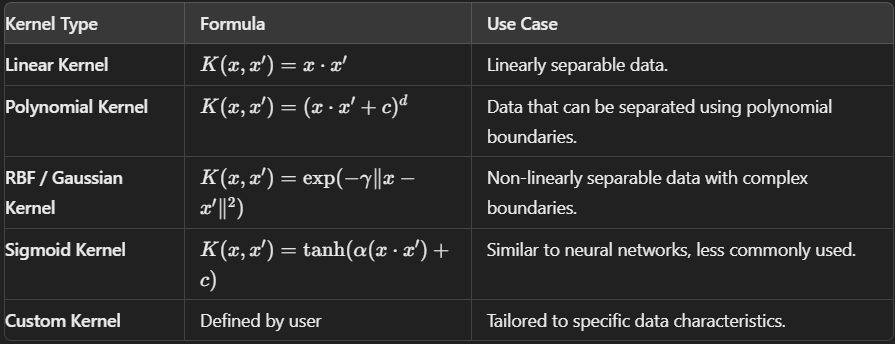

# **Conclusion:**
The experiment demonstrates that after applying PCA dimensionality reduction, the first principal component effectively separates the classes, as seen in the strong clustering of points along the x-axis. The presence of support vectors at the class boundaries, typical of SVM, further confirms that the classes are well-defined in this transformed space. The multi-class problem is evident from the various color clusters, and the clear separation between them suggests that a linear SVM is suitable for classification in this scenario. Overall, the transformation process has successfully aligned the data in a way that allows for efficient and accurate classification using SVM.








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [ ]:
from google.colab import files
uploaded = files.upload()

# Print the keys in the uploaded dictionary
print("Keys in uploaded:", uploaded.keys())

Saving ObesityDataSet.csv to ObesityDataSet.csv
Keys in uploaded: dict_keys(['ObesityDataSet.csv'])


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ObesityDataSet.csv']))

In [ ]:
print("Head of the dataset:\n", df.head())

Head of the dataset:
    Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_

In [ ]:
# Separate target and inputs
target = df["NObeyesdad"]
inputs = df.drop(["NObeyesdad"], axis=1)

# Encoding categorical variables
label_gender = LabelEncoder()
label_family_history = LabelEncoder()
label_favc = LabelEncoder()
label_fcvc = LabelEncoder()
label_ncp = LabelEncoder()
label_caec = LabelEncoder()
label_smoke = LabelEncoder()
label_scc = LabelEncoder()
label_faf = LabelEncoder()
label_tue = LabelEncoder()
label_calc = LabelEncoder()
label_mtrans = LabelEncoder()

# Apply encoding to the categorical columns
inputs["Gender"] = label_gender.fit_transform(inputs["Gender"])
inputs["family_history_with_overweight"] = label_family_history.fit_transform(inputs["family_history_with_overweight"])
inputs["FAVC"] = label_favc.fit_transform(inputs["FAVC"])
inputs["FCVC"] = label_fcvc.fit_transform(inputs["FCVC"])
inputs["NCP"] = label_ncp.fit_transform(inputs["NCP"])
inputs["CAEC"] = label_caec.fit_transform(inputs["CAEC"])
inputs["SMOKE"] = label_smoke.fit_transform(inputs["SMOKE"])
inputs["SCC"] = label_scc.fit_transform(inputs["SCC"])
inputs["FAF"] = label_faf.fit_transform(inputs["FAF"])
inputs["TUE"] = label_tue.fit_transform(inputs["TUE"])
inputs["CALC"] = label_calc.fit_transform(inputs["CALC"])
inputs["MTRANS"] = label_mtrans.fit_transform(inputs["MTRANS"])

# Display encoded inputs
print("Encoded inputs:\n", inputs.head())
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

Encoded inputs:
    Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   170   
1       0  21.0    1.52    56.0                               1     0   809   
2       1  23.0    1.80    77.0                               1     0   170   
3       1  27.0    1.80    87.0                               0     0   809   
4       1  22.0    1.78    89.8                               0     0   170   

   NCP  CAEC  SMOKE  CH2O  SCC   FAF  TUE  CALC  MTRANS  
0  477     2      0   2.0    0     0  840     3       3  
1  477     2      1   3.0    1  1189    0     2       3  
2  477     2      0   2.0    0  1071  840     1       3  
3  477     2      0   2.0    0  1071    0     1       4  
4    0     2      0   2.0    0     0    0     2       3  


In [ ]:
from sklearn.svm import SVC
# Training the SVM Model
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1.0)  # C is a hyperparameter that controls the trade-off between smooth decision boundary and classifying training points correctly
svm_model.fit(x_train_scaled, y_train)

#Evaluate the Model
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
y_pred = svm_model.predict(x_test_scaled)

# Display performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9621749408983451
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.97        56
      Normal_Weight       0.96      0.87      0.92        62
     Obesity_Type_I       0.99      0.97      0.98        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.90      0.95      0.92        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



In [ ]:
# Display SVM properties
print("Support Vectors:")
print(svm_model.support_vectors_)

print("\nNumber of Support Vectors for Each Class:")
print(svm_model.n_support_)

print("\nSVM Coefficients:")
print(svm_model.coef_)

print("\nIntercept:")
print(svm_model.intercept_)

Support Vectors:
[[-1.01311923 -0.06933846 -1.08977027 ... -1.18177939  1.41169828
   0.50676114]
 [-1.01311923 -0.77863072 -1.93850122 ...  0.31378874 -0.52565676
   0.50676114]
 [ 0.98705066 -0.9761472  -0.02333874 ...  1.10145463 -0.52565676
   0.50676114]
 ...
 [ 0.98705066 -1.14435732  1.05411778 ...  0.77492225 -0.52565676
   0.50676114]
 [ 0.98705066 -0.22377429  0.1862647  ...  0.92198645 -0.52565676
   0.50676114]
 [-1.01311923 -0.22534243 -0.55353551 ...  1.6298887   1.41169828
   0.50676114]]

Number of Support Vectors for Each Class:
[ 66 112  92  35  12 133 133]

SVM Coefficients:
[[-9.07110836e-02 -1.04491725e-01  1.65625478e+00 -7.12088068e+00
   3.21787888e-02 -3.19134022e-02  1.90961979e-01 -4.83223947e-02
  -5.26889044e-02 -3.09941084e-02  3.41344520e-02 -4.26542343e-02
  -5.16003555e-02  2.46417103e-02  2.18905383e-02 -8.99567975e-02]
 [-2.07379109e-02 -2.47930034e-02  3.56489479e-01 -1.59434378e+00
  -6.16302397e-02 -1.66533454e-16 -1.94220946e-02  5.20864738e-02
  

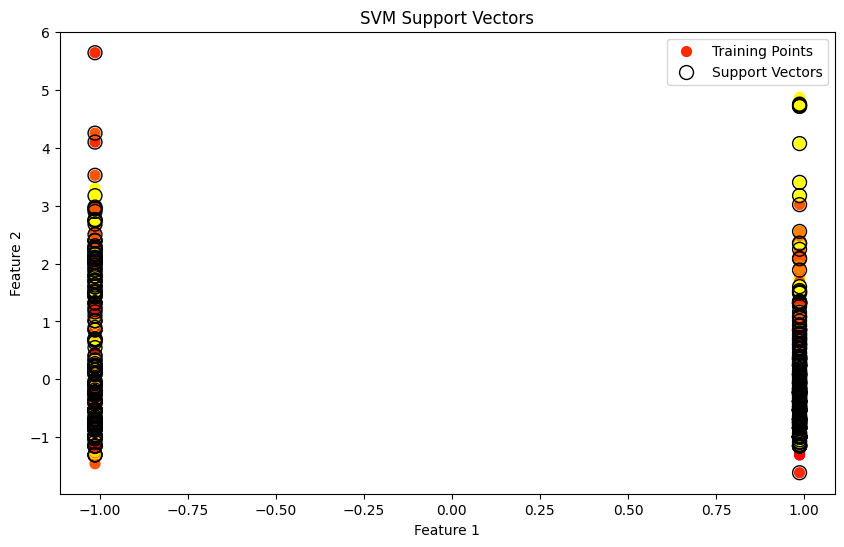

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode the target labels (y_train) into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Select two features for visualization
X_train_2d = x_train_scaled[:, :2]  # Adjust indices for the first two features
X_test_2d = x_test_scaled[:, :2]
support_vectors_2d = svm_model.support_vectors_[:, :2]

plt.figure(figsize=(10, 6))

# Plot training points with encoded labels for color mapping
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_encoded, s=50, cmap='autumn', label='Training Points')

# Plot support vectors
plt.scatter(support_vectors_2d[:, 0], support_vectors_2d[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Support Vectors')
plt.legend()
plt.show()


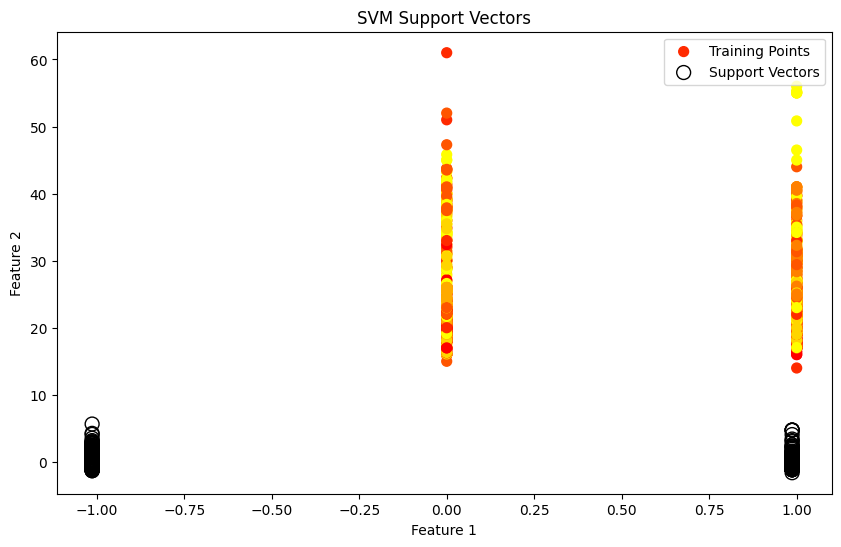

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select two features for visualization from the unscaled data using .iloc
X_train_unscaled = x_train.iloc[:, :2].values  # Use unscaled features (first two columns)
support_vectors_unscaled = svm_model.support_vectors_[:, :2]  # Use support vectors from the scaled data

plt.figure(figsize=(10, 6))

# Plot training points with encoded labels for color mapping
plt.scatter(X_train_unscaled[:, 0], X_train_unscaled[:, 1], c=y_train_encoded, s=50, cmap='autumn', label='Training Points')

# Plot support vectors (use scaled data support vectors)
plt.scatter(support_vectors_unscaled[:, 0], support_vectors_unscaled[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Support Vectors')
plt.legend()
plt.show()


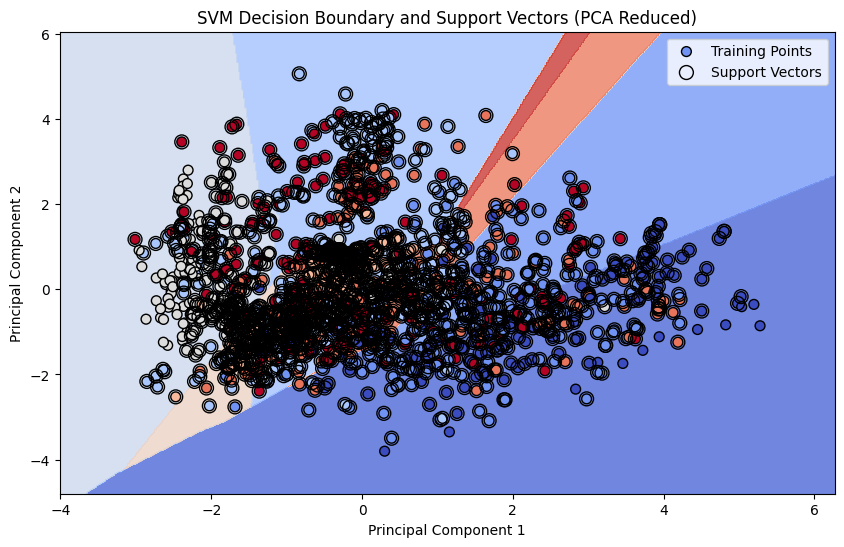

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Step 1: Apply PCA to reduce the dataset to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

# Step 2: Train the SVM model on the PCA-reduced dataset
svm_model_pca = SVC(kernel='linear', C=1.0)
svm_model_pca.fit(X_train_pca, y_train_encoded)  # Use encoded labels

# Step 3: Plotting decision boundaries and support vectors
plt.figure(figsize=(10, 6))

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict labels for the mesh grid points
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary (now using numeric predictions)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, s=50, cmap='coolwarm', edgecolors='k', label='Training Points')

# Highlight support vectors
plt.scatter(svm_model_pca.support_vectors_[:, 0], svm_model_pca.support_vectors_[:, 1], facecolors='none', edgecolors='k', s=100, label='Support Vectors')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary and Support Vectors (PCA Reduced)')
plt.legend()
plt.show()


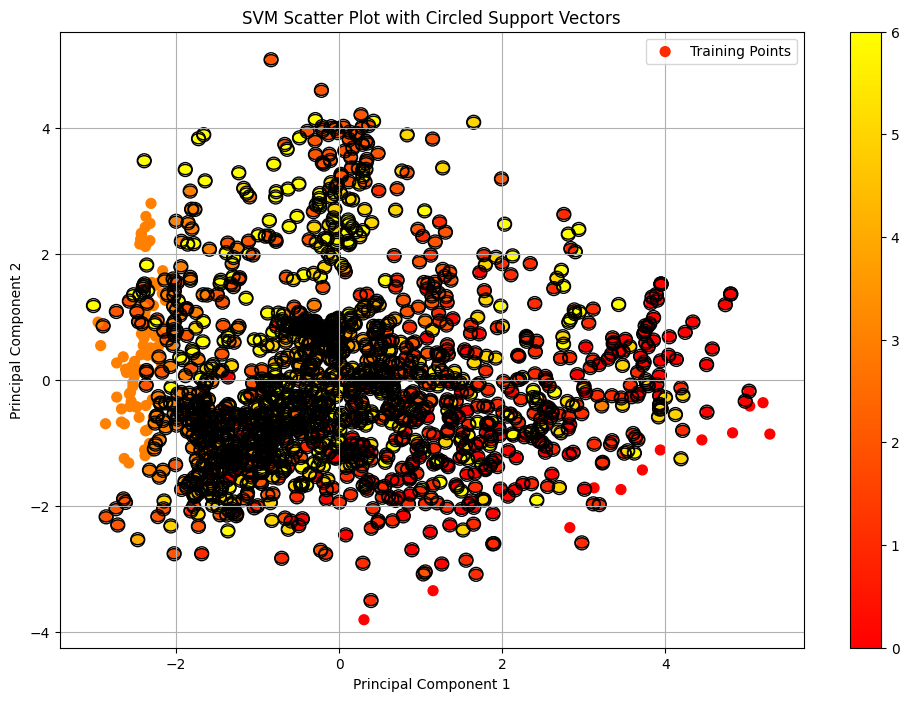

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Assuming x_train and y_train are already defined

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_scaled)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_pca, y_train)

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Get support vectors in PCA space
support_vectors_pca = svm_model.support_vectors_

plt.figure(figsize=(12, 8))

# Plot training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                      c=y_train_encoded, s=50, cmap='autumn',
                      label='Training Points')

# Plot and circle support vectors
for sv in support_vectors_pca:
    plt.scatter(sv[0], sv[1], s=100, facecolors='none', edgecolors='k')
    circle = plt.Circle((sv[0], sv[1]), 0.08, fill=False, color='k')
    plt.gca().add_artist(circle)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Scatter Plot with Circled Support Vectors')
plt.legend()
plt.colorbar(scatter)
plt.grid(True)

plt.show()